In [1]:
import operator
import os
import numpy as np
import matplotlib.pyplot as plt
from defs import *
import model
from scipy.interpolate import make_interp_spline, BSpline
from PIL import Image

Read the data set

In [2]:
X_TRAIN, Y_TRAIN, X_TEST, Y_TEST = read_data()

Plot the data set:

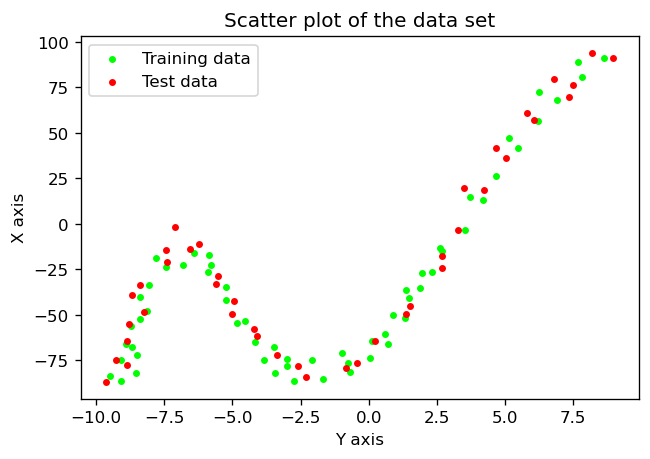

In [3]:
plt.figure(figsize=(6, 4), dpi=120)
plt.scatter(x=X_TRAIN, y=Y_TRAIN, s=10, c='#00FF00')
plt.scatter(x=X_TEST, y=Y_TEST, s=10, c='#FF0000')
plt.title("Scatter plot of the data set")
plt.ylabel("X axis")
plt.xlabel("Y axis")
plt.legend(labels=["Training data", "Test data"])
plt.show()

## PART A & B
Regress the training data using 512 units

NN w/ 1 Hidden Layer w/ 512 units...
Max epochs have been reached... w/ Loss = 5738.594576260496


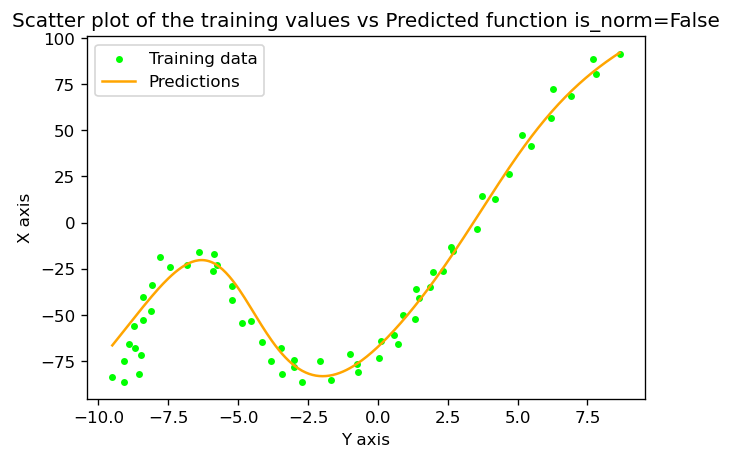

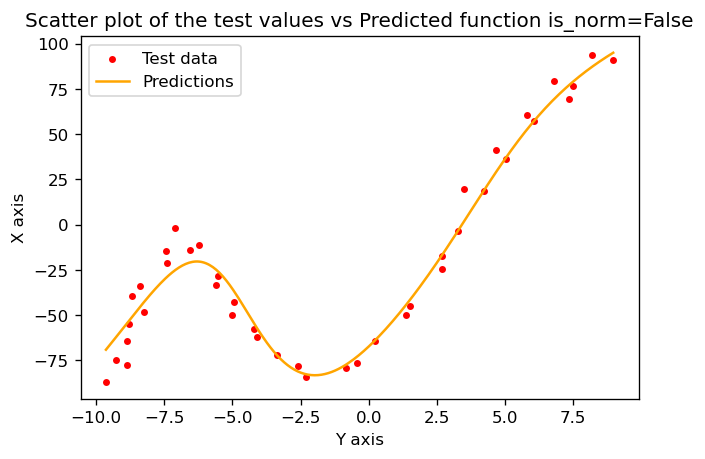

Training loss = 5738.594576260496
Test loss = 3670.5234328358874


In [4]:
artificial_nn = model.ANN(num_units=512, epochs=500000, learning_rate=5e-5, is_normalized=False, stop_M=3)
artificial_nn.train(X_TRAIN, Y_TRAIN)
y_predict_train, train_losses = artificial_nn.predict(X_TRAIN, Y_TRAIN)
y_predict_test, test_losses = artificial_nn.predict(X_TEST, Y_TEST)
plot_predictions(X_TRAIN, Y_TRAIN, y_predict_train, is_test=False, is_norm=False)
plot_predictions(X_TEST, Y_TEST, y_predict_test, is_test=True, is_norm=False)
print(f"Training loss - mean= {np.mean(train_losses)}")
print(f"Test loss - mean = {np.mean(test_losses)}")

Now, use no units at all, simple linear regression:

Using no hidden layers...
Epoch 5 have converged w/ Loss = 351.09973537445023
Max epochs have been reached... w/ Loss = 351.09973537445023


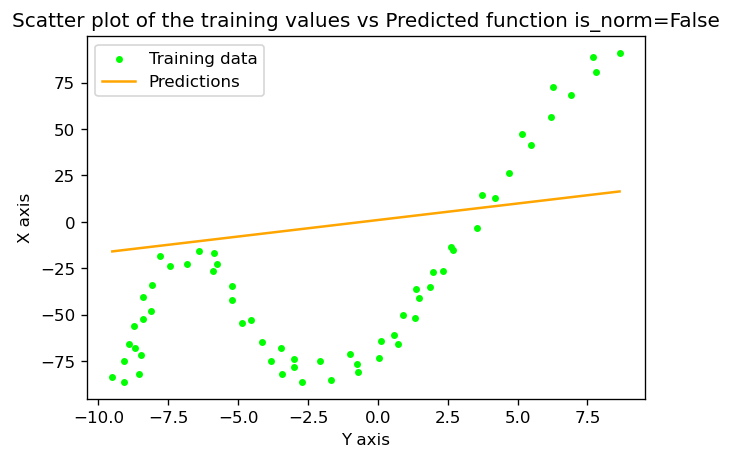

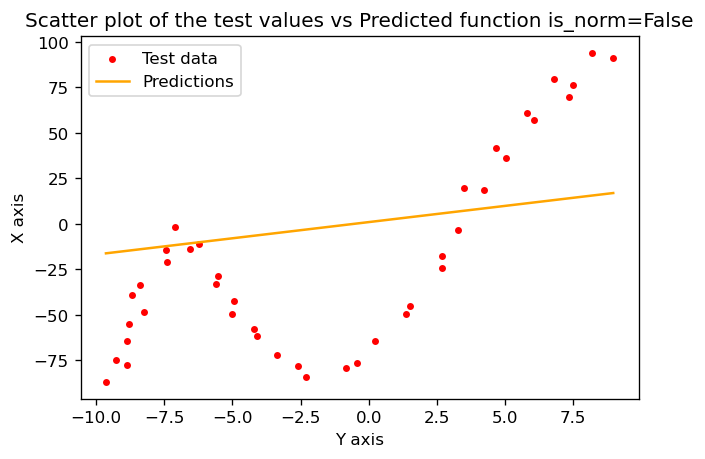

Training loss - mean= 12014482.567888241
Test loss - mean = 5429680.782526163


In [4]:
artificial_nn_linear = model.ANN(num_units=0, epochs=100000, learning_rate=5e-4, is_normalized=False, stop_M=3)
artificial_nn_linear.train(X_TRAIN, Y_TRAIN)
y_predict_train_linear, train_loss_linear = artificial_nn_linear.predict(X_TRAIN, Y_TRAIN)
y_predict_test_linear, test_loss_linear = artificial_nn_linear.predict(X_TEST, Y_TEST)
plot_predictions(X_TRAIN, Y_TRAIN, y_predict_train_linear, is_test=False, is_norm=False)
plot_predictions(X_TEST, Y_TEST, y_predict_test_linear, is_test=True, is_norm=False)
print(f"Training loss - mean= {np.mean(train_loss_linear)}")
print(f"Test loss - mean = {np.mean(test_loss_linear)}")

Now, use normalization

Using normalization...
NN w/ 1 Hidden Layer w/ 24 units...
Max epochs have been reached... w/ Loss = 3046.851712756804
Using normalization while predicting...
Using normalization while predicting...


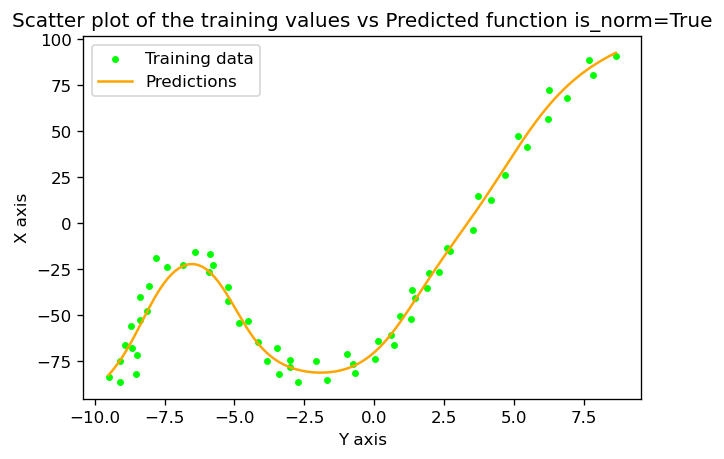

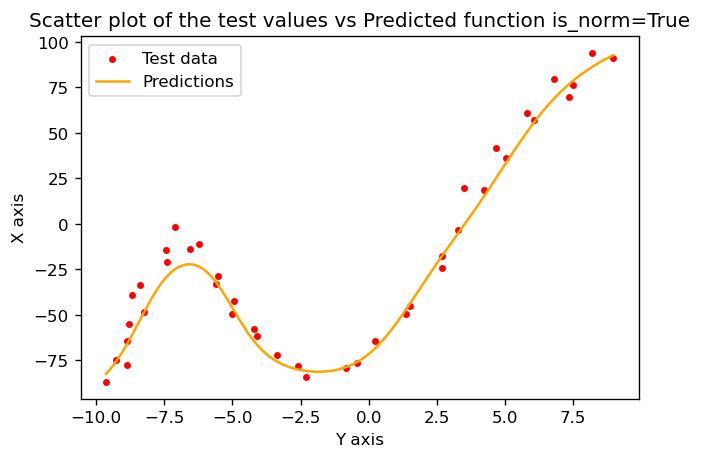

Training loss - mean= 50.78086187928007
Test loss - mean = 83.34653801143037


In [13]:
is_normalized = True
artificial_nn_normalized = model.ANN(num_units=24, epochs=100000, learning_rate=8e-4, is_normalized=is_normalized, stop_M=2)
artificial_nn_normalized.train(X_TRAIN, Y_TRAIN)
y_predict_train_norm, train_loss_norm = artificial_nn_normalized.predict(X_TRAIN, Y_TRAIN)
y_predict_test_norm, test_loss_norm = artificial_nn_normalized.predict(X_TEST, Y_TEST)
plot_predictions(X_TRAIN, Y_TRAIN, y_predict_train_norm, is_test=False, is_norm=is_normalized)
plot_predictions(X_TEST, Y_TEST, y_predict_test_norm, is_test=True, is_norm=is_normalized)
print(f"Training loss - mean= {np.mean(train_loss_norm)}")
print(f"Test loss - mean = {np.mean(test_loss_norm)}")

## PART C
Use the following hyperparameters for the following 5 runs:<br>
<code>num_units = [2, 4, 8, 16, 32]
learning_rates = [5e-4, 5e-4, 5e-4, 5e-4, 5e-4]
stop_Ms = [3, 3, 3, 3, 3]
</code>
Then plot the training predictions as in previous part by using these hyperparameters only. However, arrange learning rates, initial weights, stopping conditions accordingly.<br>
Then, create two tables, for training loss and the test loss. Report the training loss averaged over training set instances and the standard deviation of this array, whose size is 5. Then, same for the test loss/ set.

Using normalization...
Using no hidden layers...
Epoch 3 have converged w/ Loss = 163.47034283012812
Max epochs have been reached... w/ Loss = 163.47034283012812
Using normalization while predicting...
Using normalization while predicting...


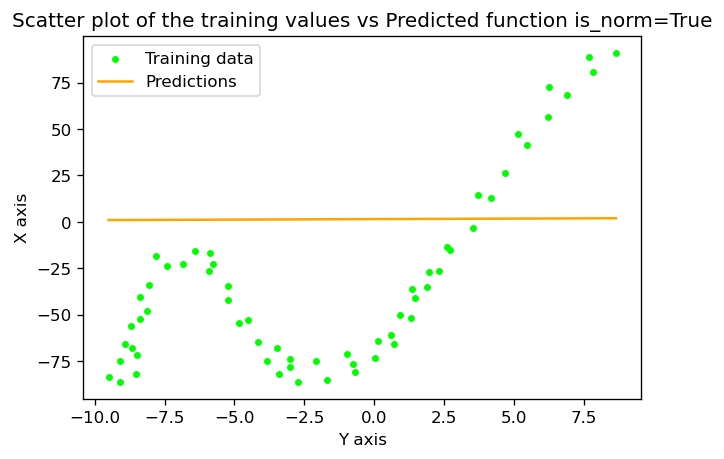

Training loss averaged over training instances = 3489.0352315127984
Test loss averaged over test instances = 3238.784300865324
Standard deviation of the training losses = 2514.63458877791
Standard deviation of the test losses = 2572.6841768768963
Using normalization...
NN w/ 1 Hidden Layer w/ 2 units...
Max epochs have been reached... w/ Loss = 60485.060419009635
Using normalization while predicting...
Using normalization while predicting...


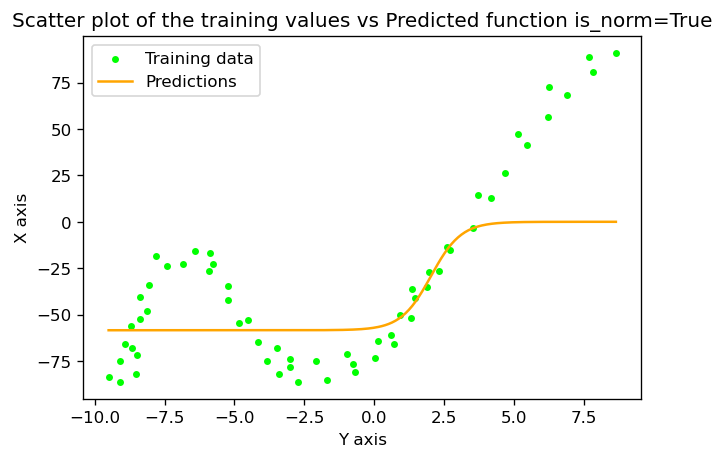

Training loss averaged over training instances = 1008.0843403168273
Test loss averaged over test instances = 1526.8727991642284
Standard deviation of the training losses = 1824.0257632540654
Standard deviation of the test losses = 2248.0887702045443
Using normalization...
NN w/ 1 Hidden Layer w/ 4 units...


KeyboardInterrupt: 

In [14]:
num_units = [0, 2, 4, 8, 16, 32]
learning_rates = [5e-4, 5e-4, 5e-4, 5e-4, 5e-4, 5e-4]
stop_Ms = [3, 3, 3, 3, 3, 3]
is_normalized = True
train_losses = []
test_losses = []
plots = []
for i in range(6):
    artificial_nn_part_c = model.ANN(num_units=num_units[i], epochs=100000, learning_rate=learning_rates[i], is_normalized=is_normalized, stop_M=stop_Ms[i])
    artificial_nn_part_c.train(X_TRAIN, Y_TRAIN)
    y_predict_train_part_c, train_losses_part_c = artificial_nn_part_c.predict(X_TRAIN, Y_TRAIN)
    y_predict_test_part_c, test_losses_part_c = artificial_nn_part_c.predict(X_TEST, Y_TEST)

    # Plot the predictions for the training set
    plot_predictions(X_TRAIN, Y_TRAIN, y_predict_train_part_c, is_test=False, is_norm=is_normalized, show=True)
    # plots.append(plot)

    # Record the losses
    train_losses_part_c_mean = float(np.mean(train_losses_part_c))
    test_losses_part_c_mean = float(np.mean(test_losses_part_c))

    train_losses_part_c_std = float(np.var(train_losses_part_c)) ** 0.5
    test_losses_part_c_std = float(np.var(test_losses_part_c)) ** 0.5

    print(f"Training loss averaged over training instances = {train_losses_part_c_mean}")
    print(f"Test loss averaged over test instances = {test_losses_part_c_mean}")
    print(f"Standard deviation of the training losses = {train_losses_part_c_std}")
    print(f"Standard deviation of the test losses = {test_losses_part_c_std}")

    artificial_nn_part_c = None